# XRAYVISION

## RHESSI 17, June 18-22, 2018, Trinity Collge Dublin
### Shane Maloney

## What
* XRAY VISibilty ImagiNg (XRAYVISION)
* Python library for Fourier type X-ray imagers
 * HXT, RHESSI, STX, ...
* Inputs are visibilities
 * Converstion from counts to visibilites left to instrument specfiic codes
* Build on scientific python stack

![python_stack.jpg](images/python_stack.jpg)

## Why

* Science should be _easily_ reproducible
* Science is software <--> software is science
 * Software is the most used instrument
 * 15 - 50 errors per 1000 LOC (professional software developers/engineers)
* Understand the code/algorithms


 ## Why
 
 * IDL
  * Licsenses 💰
  * Poor support 🤠
  * Doesn't encourage good code ☹️ (frown)
 * SSW (SSWIDL)
  * Documentation 😩 (weary)
  * Tests 😫 (distraught)
  * Path to contribute 😕 (confused)
  * Maintainence 😧 (anguished)
  * Stability 😓 (cold sweat)

## Code time

In [6]:
# Here are our imports (press shift+enter)
import numpy as np

from matplotlib import pyplot as plt
from astropy import units as u
from sunpy.map import Map

from xrayvision.visibility import RHESSIVisibility
from xrayvision.clean import clean, ms_clean
from xrayvision import SAMPLE_RHESSI_VISIBILITIES

plt.ion() # Don't have to call plt.show() all the time
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams['font.size'] = 14

import warnings
warnings.simplefilter('ignore') #Pretty output for presentation

## Let's plot a RHESSI image 😎

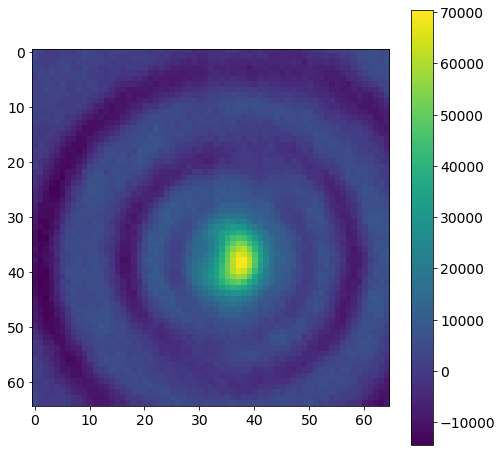

In [8]:
rhessi_vis = RHESSIVisibility.from_fits_file(SAMPLE_RHESSI_VISIBILITIES)
rhessi_image = rhessi_vis.to_image(shape=(65, 65), pixel_size=[3, 3]*u.arcsec)
plt.imshow(rhessi_image)
plt.colorbar();

You can even change the code and update the plot in real-time!

But we can do better

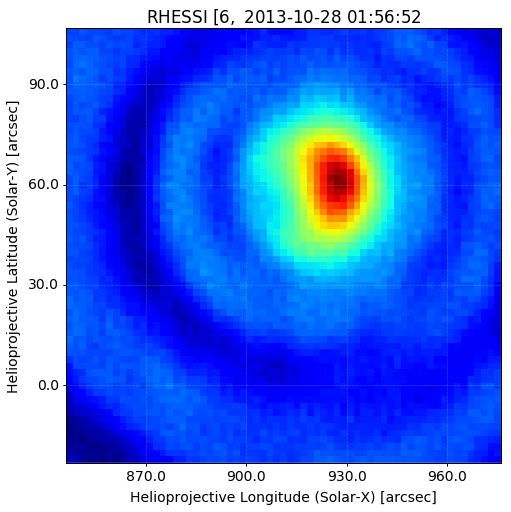

In [3]:
rhessi_map = rhessi_vis.to_map(shape=(65, 65), pixel_size=[2, 2]*u.arcsec)
rhessi_map.plot();

In [4]:
rhessi_map

SunPy Map
---------
Observatory:		 RHESSI
Instrument:		 RHESSI
Detector:		 RHESSI
Measurement:		 [ 6. 12.] keV
Wavelength:		 [ 6. 12.] keV
Observation Date:	 2013-10-28 01:56:52
Exposure Time:		 0.000000 s
Dimension:		 [65. 65.] pix
Coordinate System:	 helioprojective
Scale:			 [2. 2.] arcsec / pix
Reference Pixel:	 [33. 33.] pix
Reference Coord:	 [911.08380127  41.81555176] arcsec

array([[ -6786.41192486,  -6788.69023437,  -9558.49609114, ...,
          -165.63918737,  -2246.23817048,  -1115.78352373],
       [ -8546.28393465,  -9613.20166377, -10450.18098346, ...,
           896.95650771,  -1306.93662074,     40.95851186],
       [ -9272.6153593 ,  -9861.51516993,  -9460.65060812, ...,
          1915.00013811,   -325.89119675,   -359.4183666 ],
       ...,
       [  3923.96673697,   6302.06157491,   6371.91356881, ...,
         -5231.45748584,  -6363.01613851,  -6460.8237338 ],
       [  5033.61987325,   4173.09411523,   4399.33168977, ...,
         -6624.83552532,  -6012.03915468, 

How about we clean the image

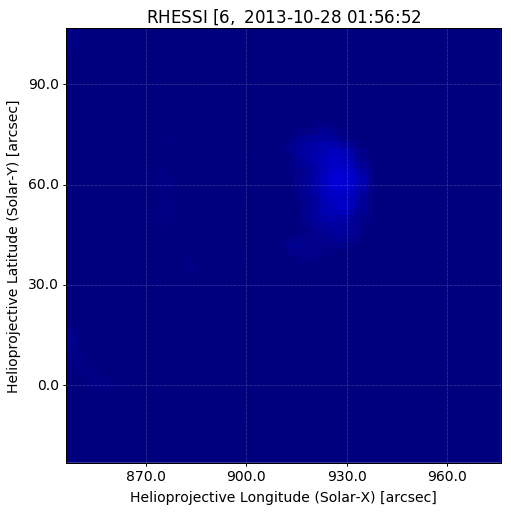

In [20]:
rhessi_vis.vis = np.ones(rhessi_vis.vis.shape)
dirty_beam = rhessi_vis.to_image(shape=(65 * 3, 65 * 3), pixel_size=[4., 4.] * u.arcsec)

clean_data, residuals = clean(dirty_map=rhessi_map.data, dirty_beam=dirty_beam,
                                             gain=0.05, niter=1000, clean_beam_width=1.0)

clean_map = Map((clean_data, rhessi_map.meta));
clean_map.plot(vmax=rhessi_map.data.max());

What about multi-scale version of clean?

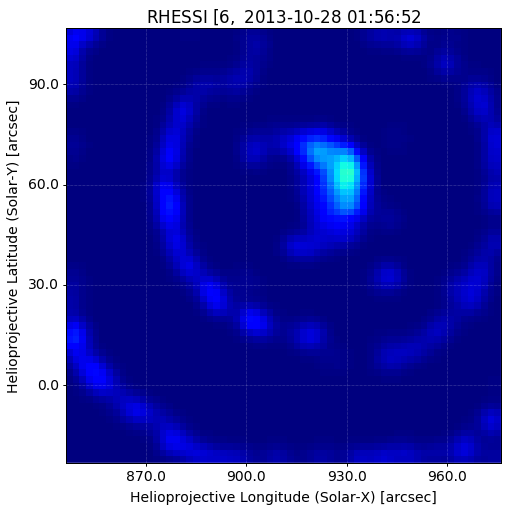

In [19]:
rhessi_vis.vis = np.ones(rhessi_vis.vis.shape)
dirty_beam = rhessi_vis.to_image(shape=(65 * 3, 65 * 3), pixel_size=[4., 4.] * u.arcsec)

ms_clean_data, ms_residuals = ms_clean(dirty_map=rhessi_map.data, dirty_beam=dirty_beam,
                                             gain=0.05, niter=5000, clean_beam_width=1.0, scales=[1,2,4])

ms_clean_map = Map((ms_clean_data, rhessi_map.meta));
ms_clean_map.plot(vmax=rhessi_map.data.max());

 ## Comparision
 
 XRARVISION | SSW
- | - 
![alt](images/xrayvision_bp.png) | ![alt](images/ssw_bp.png)


 XRARVISION | SSW
- | - 
![alt](images/xrayvision_clean.png) | ![alt](images/ssw_clean.png)


## Current Status

* Still under heavy development
* Algorithms
  * CLEAN
  * MS-CLEAN
* Documentation on Read The Docs
* Automated builds and test on Travis CI
* 

## Future
* Low effort
 * Utility functions
 * 
 * CLEAN windows
* Medium effort
 * Better representations for FITS files containing multiple times and energies
 * 
* Hight effort
 * Visibility error
 * MEM methods
 * VisPixon
* Newer algorithms
 * Compressed sensing
 * < your method here >

XRAYVISION

github github.com/sunpy/xrayvision

